In [1]:
#Importación de librerias

%pip install numpy scipy
import pandas as pd
import numpy as np
%pip install scikit-learn
%pip install seaborn
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
df_vf = pd.read_csv("df_vf_modificado.csv", index_col=0)

In [20]:
# Mostrar los primeros registros del DataFrame para verificar la carga correcta
print("Primeros registros del DataFrame:\n", df_vf.head(1))

# Calcular y mostrar la cantidad de valores nulos en cada columna
nulos_por_columna = df_vf.isnull().sum()

nulos_por_columna

Primeros registros del DataFrame:
                abbreviation  agriculturalland(%) landarea(km2)  \
density(p/km2)                                                   
60                       AF                 58.1       652,230   

               armedforcessize  birthrate  callingcode capital/majorcity  \
density(p/km2)                                                             
60                     323,000      32.49         93.0             Kabul   

               co2-emissions    cpi  cpichange(%) currency-code  \
density(p/km2)                                                    
60                     8,672  149.9           2.3           AFN   

                fertilityrate  forestedarea(%) gasolineprice  \
density(p/km2)                                                 
60                       4.47              2.1        $0.70    

                             gdp  grossprimaryeducationenrollment(%)  \
density(p/km2)                                                        

abbreviation                             7
agriculturalland(%)                      0
landarea(km2)                            1
armedforcessize                         24
birthrate                                0
callingcode                              0
capital/majorcity                        3
co2-emissions                            7
cpi                                     17
cpichange(%)                             0
currency-code                           15
fertilityrate                            0
forestedarea(%)                          0
gasolineprice                           20
gdp                                      2
grossprimaryeducationenrollment(%)       0
grosstertiaryeducationenrollment(%)      0
infantmortality                          0
largestcity                              6
lifeexpectancy                           0
maternalmortalityratio                   0
minimumwage                             45
officiallanguage                         5
outofpocket

In [4]:
data_numericas = df_vf.select_dtypes(include=['number'])
print("\nColumnas numéricas:\n", data_numericas.columns)
 


Columnas numéricas:
 Index(['agriculturalland(%)', 'birthrate', 'callingcode', 'cpichange(%)',
       'fertilityrate', 'forestedarea(%)',
       'grossprimaryeducationenrollment(%)',
       'grosstertiaryeducationenrollment(%)', 'infantmortality',
       'lifeexpectancy', 'maternalmortalityratio',
       'outofpockethealthexpenditure', 'physiciansperthousand',
       'populationlaborforceparticipation(%)', 'taxrevenue(%)', 'totaltaxrate',
       'unemploymentrate'],
      dtype='object')


In [5]:
# Calcular y mostrar la cantidad de valores nulos en cada columna numérica
nulos_por_columna = data_numericas.isnull().sum()
nulos_por_columna

agriculturalland(%)                     0
birthrate                               0
callingcode                             0
cpichange(%)                            0
fertilityrate                           0
forestedarea(%)                         0
grossprimaryeducationenrollment(%)      0
grosstertiaryeducationenrollment(%)     0
infantmortality                         0
lifeexpectancy                          0
maternalmortalityratio                  0
outofpockethealthexpenditure            0
physiciansperthousand                   0
populationlaborforceparticipation(%)    0
taxrevenue(%)                           0
totaltaxrate                            0
unemploymentrate                        0
dtype: int64

In [6]:
df_vf.shape

(195, 33)

In [7]:
porcentaje_nulos_num = (nulos_por_columna / df_vf.shape[0]) * 100

In [8]:
porcentaje_nulos_num 

agriculturalland(%)                     0.0
birthrate                               0.0
callingcode                             0.0
cpichange(%)                            0.0
fertilityrate                           0.0
forestedarea(%)                         0.0
grossprimaryeducationenrollment(%)      0.0
grosstertiaryeducationenrollment(%)     0.0
infantmortality                         0.0
lifeexpectancy                          0.0
maternalmortalityratio                  0.0
outofpockethealthexpenditure            0.0
physiciansperthousand                   0.0
populationlaborforceparticipation(%)    0.0
taxrevenue(%)                           0.0
totaltaxrate                            0.0
unemploymentrate                        0.0
dtype: float64


Columnas numéricas:
 Index(['agriculturalland(%)', 'birthrate', 'callingcode', 'cpichange(%)',
       'fertilityrate', 'forestedarea(%)',
       'grossprimaryeducationenrollment(%)',
       'grosstertiaryeducationenrollment(%)', 'infantmortality',
       'lifeexpectancy', 'maternalmortalityratio',
       'outofpockethealthexpenditure', 'physiciansperthousand',
       'populationlaborforceparticipation(%)', 'taxrevenue(%)', 'totaltaxrate',
       'unemploymentrate'],
      dtype='object')


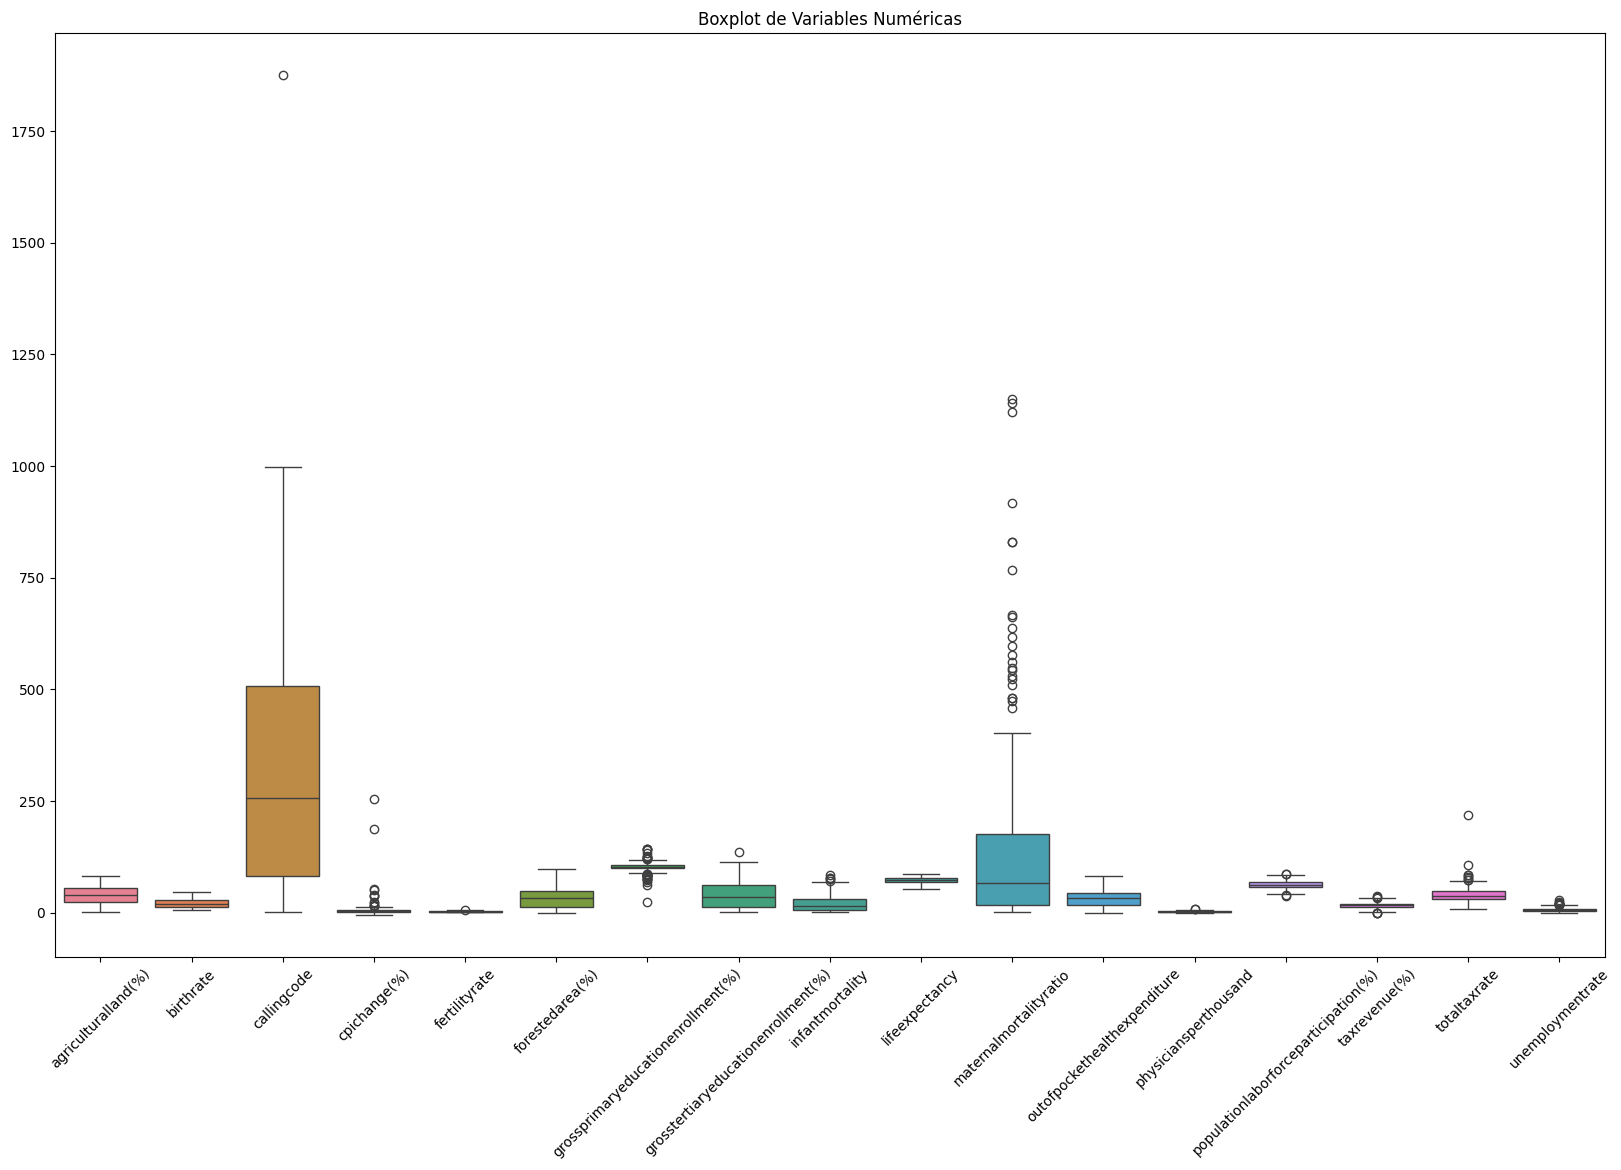

In [9]:
# Seleccionar y mostrar las columnas numéricas
data_numericas = df_vf.select_dtypes(include=['number'])
print("\nColumnas numéricas:\n", data_numericas.columns)

# Dibujar boxplot para cada columna numérica
plt.figure(figsize=(20, 12))  # Ajustar el tamaño de la figura
sns.boxplot(data=data_numericas)
plt.title('Boxplot de Variables Numéricas')
plt.xticks(rotation=45)
plt.show()

In [10]:
# Seleccionar y mostrar las columnas categóricas
df_vf_categoricas = df_vf.select_dtypes(include=['object', 'category'])
print("\nColumnas categóricas:\n", df_vf_categoricas.columns)

# Calcular y mostrar la cantidad de valores nulos en cada columna categórica
nulos_por_columna_cat = df_vf_categoricas.isnull().sum()
print("\nCantidad de valores nulos por columna (categóricas):\n", nulos_por_columna_cat)

# Calcular y mostrar el porcentaje de valores nulos en cada columna categórica
porcentaje_nulos_cat = (nulos_por_columna_cat / df_vf.shape[0]) * 100
print("\nPorcentaje de valores nulos por columna (categóricas):\n", porcentaje_nulos_cat)


Columnas categóricas:
 Index(['abbreviation', 'landarea(km2)', 'armedforcessize', 'capital/majorcity',
       'co2-emissions', 'cpi', 'currency-code', 'gasolineprice', 'gdp',
       'largestcity', 'minimumwage', 'officiallanguage', 'population',
       'urban_population', 'longitude', 'latitude'],
      dtype='object')

Cantidad de valores nulos por columna (categóricas):
 abbreviation          7
landarea(km2)         1
armedforcessize      24
capital/majorcity     3
co2-emissions         7
cpi                  17
currency-code        15
gasolineprice        20
gdp                   2
largestcity           6
minimumwage          45
officiallanguage      5
population            1
urban_population      5
longitude             0
latitude              0
dtype: int64

Porcentaje de valores nulos por columna (categóricas):
 abbreviation          3.589744
landarea(km2)         0.512821
armedforcessize      12.307692
capital/majorcity     1.538462
co2-emissions         3.589744
cpi           

In [11]:
#calcular los valores unicos de cada variable de categorica

df_vf['abbreviation'].mode()[0]

'AD'

In [12]:
df_vf['landarea(km2)'].mode()[0]

'0'

In [13]:
df_vf['armedforcessize'].mode()[0]

'2,000'

In [14]:
for col in df_vf.columns:  
   moda=df_vf[col].mode()[0] 
   print(f"Moda de la columna '{col}': {moda}")

Moda de la columna 'abbreviation': AD
Moda de la columna 'agriculturalland(%)': 39.11755319148936
Moda de la columna 'landarea(km2)': 0
Moda de la columna 'armedforcessize': 2,000
Moda de la columna 'birthrate': 20.214973544973542
Moda de la columna 'callingcode': 1.0
Moda de la columna 'capital/majorcity': Abu Dhabi
Moda de la columna 'co2-emissions': 143
Moda de la columna 'cpi': 106.58
Moda de la columna 'cpichange(%)': 6.722346368715083
Moda de la columna 'currency-code': EUR
Moda de la columna 'fertilityrate': 2.6981382978723403
Moda de la columna 'forestedarea(%)': 32.01542553191489
Moda de la columna 'gasolineprice': $0.71 
Moda de la columna 'gdp': $1,050,992,593 
Moda de la columna 'grossprimaryeducationenrollment(%)': 102.47021276595748
Moda de la columna 'grosstertiaryeducationenrollment(%)': 37.96338797814208
Moda de la columna 'infantmortality': 21.33280423280424
Moda de la columna 'largestcity': S����
Moda de la columna 'lifeexpectancy': 72.27967914438503
Moda de la colum

In [15]:
for col in df_vf_categoricas:
    print(f"La distribución de las categorías para la columna {col.upper()}")
    display(df_vf_categoricas[col].value_counts() / df_vf_categoricas.shape[0])  # display es una función utilizada para mostrar objetos de manera más legible en Jupyter Notebooks o entornos similares.
    print("........................")

La distribución de las categorías para la columna ABBREVIATION


abbreviation
AF    0.005128
PY    0.005128
NE    0.005128
NG    0.005128
KP    0.005128
        ...   
GR    0.005128
GD    0.005128
GT    0.005128
GN    0.005128
ZW    0.005128
Name: count, Length: 188, dtype: float64

........................
La distribución de las categorías para la columna LANDAREA(KM2)


landarea(km2)
652,230      0.005128
616          0.005128
268,838      0.005128
130,370      0.005128
1,267,000    0.005128
               ...   
349          0.005128
108,889      0.005128
245,857      0.005128
36,125       0.005128
390,757      0.005128
Name: count, Length: 194, dtype: float64

........................
La distribución de las categorías para la columna ARMEDFORCESSIZE


armedforcessize
2,000        0.035897
1,000        0.030769
16,000       0.025641
9,000        0.025641
4,000        0.025641
               ...   
3,031,000    0.005128
43,000       0.005128
146,000      0.005128
180,000      0.005128
51,000       0.005128
Name: count, Length: 105, dtype: float64

........................
La distribución de las categorías para la columna CAPITAL/MAJORCITY


capital/majorcity
Kabul                    0.005128
Tirana                   0.005128
Wellington               0.005128
Managua                  0.005128
Niamey                   0.005128
                           ...   
Athens                   0.005128
St. George's, Grenada    0.005128
Guatemala City           0.005128
Conakry                  0.005128
Harare                   0.005128
Name: count, Length: 192, dtype: float64

........................
La distribución de las categorías para la columna CO2-EMISSIONS


co2-emissions
143       0.010256
495       0.010256
28,284    0.010256
2,017     0.010256
7,407     0.005128
            ...   
16,670    0.005128
62,434    0.005128
268       0.005128
16,777    0.005128
10,983    0.005128
Name: count, Length: 184, dtype: float64

........................
La distribución de las categorías para la columna CPI


cpi
110.62    0.010256
99.55     0.010256
106.58    0.010256
149.9     0.005128
114.24    0.005128
            ...   
112.85    0.005128
268.36    0.005128
101.87    0.005128
107.43    0.005128
105.51    0.005128
Name: count, Length: 175, dtype: float64

........................
La distribución de las categorías para la columna CURRENCY-CODE


currency-code
EUR    0.117949
XOF    0.041026
XCD    0.030769
USD    0.030769
XAF    0.025641
         ...   
GMD    0.005128
FJD    0.005128
ETB    0.005128
ERN    0.005128
ZMW    0.005128
Name: count, Length: 133, dtype: float64

........................
La distribución de las categorías para la columna GASOLINEPRICE


gasolineprice
$0.71     0.030769
$1.16     0.025641
$0.92     0.025641
$1.12     0.020513
$0.98     0.020513
            ...   
$1.74     0.005128
$1.19     0.005128
$1.55     0.005128
$0.43     0.005128
$1.34     0.005128
Name: count, Length: 101, dtype: float64

........................
La distribución de las categorías para la columna GDP


gdp
$19,101,353,833      0.005128
$6,552,858,739       0.005128
$12,520,915,291      0.005128
$12,928,145,120      0.005128
$448,120,428,859     0.005128
                       ...   
$1,228,170,370       0.005128
$76,710,385,880      0.005128
$13,590,281,809      0.005128
$1,340,389,411       0.005128
$21,440,758,800      0.005128
Name: count, Length: 193, dtype: float64

........................
La distribución de las categorías para la columna LARGESTCITY


largestcity
S����                    0.010256
Panama City              0.005128
Managua                  0.005128
Niamey                   0.005128
Lagos                    0.005128
                           ...   
Macedonia                0.005128
St. George's, Grenada    0.005128
Guatemala City           0.005128
Kankan                   0.005128
Harare                   0.005128
Name: count, Length: 188, dtype: float64

........................
La distribución de las categorías para la columna MINIMUMWAGE


minimumwage
$0.41      0.015385
$2.00      0.015385
$2.25      0.010256
$0.88      0.010256
$0.36      0.010256
             ...   
$1.46      0.005128
$11.16     0.005128
$3.14      0.005128
$1.05      0.005128
$0.73      0.005128
Name: count, Length: 114, dtype: float64

........................
La distribución de las categorías para la columna OFFICIALLANGUAGE


officiallanguage
English             0.158974
French              0.128205
Spanish             0.097436
Arabic              0.092308
Portuguese          0.035897
                      ...   
Albanian            0.005128
Jamaican English    0.005128
Lao                 0.005128
Latvian             0.005128
Shona               0.005128
Name: count, Length: 76, dtype: float64

........................
La distribución de las categorías para la columna POPULATION


population
38,041,754    0.005128
182,790       0.005128
4,841,000     0.005128
6,545,502     0.005128
23,310,715    0.005128
                ...   
112,003       0.005128
16,604,026    0.005128
12,771,246    0.005128
1,920,922     0.005128
14,645,468    0.005128
Name: count, Length: 194, dtype: float64

........................
La distribución de las categorías para la columna URBAN_POPULATION


urban_population
9,797,273      0.005128
1,162,834      0.005128
3,846,137      0.005128
3,850,231      0.005128
102,806,948    0.005128
                 ...   
8,507,474      0.005128
40,765         0.005128
8,540,945      0.005128
4,661,505      0.005128
4,717,305      0.005128
Name: count, Length: 190, dtype: float64

........................
La distribución de las categorías para la columna LONGITUDE


longitude
('33.93911 '      0.005128
('13.909444 '     0.005128
('12.865416 '     0.005128
('17.607789 '     0.005128
('9.081999 '      0.005128
                    ...   
('12.1165 '       0.005128
('15.783471 '     0.005128
('9.945587 '      0.005128
('11.803749 '     0.005128
('-19.015438 '    0.005128
Name: count, Length: 195, dtype: float64

........................
La distribución de las categorías para la columna LATITUDE


latitude
'67.709953')     0.005128
'-60.978893')    0.005128
'-85.207229')    0.005128
'8.081666')      0.005128
'8.675277')      0.005128
                   ...   
'-61.679')       0.005128
'-90.230759')    0.005128
'-9.696645')     0.005128
'-15.180413')    0.005128
'29.154857')     0.005128
Name: count, Length: 195, dtype: float64

........................


In [31]:
import pandas as pd

# Leer el archivo CSV
df = pd.read_csv('df_vf_modificado.csv')

# Definir columnas categóricas y numéricas
columnas_categoricas = ['abbreviation', 'capital/majorcity', 'currency-code', 'largestcity', 'officiallanguage']
columnas_numericas = ['density(p/km2)', 'agriculturalland(%)', 'landarea(km2)', 'armedforcessize', 'birthrate', 'callingcode', 
                      'co2-emissions', 'cpi', 'cpichange(%)', 'fertilityrate', 'forestedarea(%)', 'gasolineprice', 'gdp', 
                      'grossprimaryeducationenrollment(%)', 'grosstertiaryeducationenrollment(%)', 'infantmortality', 'lifeexpectancy', 
                      'maternalmortalityratio', 'minimumwage', 'outofpockethealthexpenditure', 'physiciansperthousand', 'population', 
                      'populationlaborforceparticipation(%)', 'taxrevenue(%)', 'totaltaxrate', 'unemploymentrate', 'urban_population', 
                      'longitude', 'latitude']

# Asegurarse de que las columnas categóricas y numéricas estén en el dataframe
columnas_categoricas = [col for col in columnas_categoricas if col in df.columns]
columnas_numericas = [col for col in columnas_numericas if col in df.columns]

# Función para limpiar valores numéricos
def limpiar_valores(valor):
    if isinstance(valor, str):
        # Eliminar caracteres no deseados y convertir a float
        try:
            return float(valor.replace(',', '').replace('$', '').replace(' ', '').replace('(', '').replace(')', '').replace("'", ''))
        except ValueError:
            return None
    elif isinstance(valor, (int, float)):
        return valor
    else:
        return None

# Limpiar y convertir columnas numéricas
for columna in columnas_numericas:
    df[columna] = df[columna].apply(limpiar_valores)

# Imputar valores nulos para columnas categóricas con 'Unknown' o la moda
for columna in columnas_categoricas:
    if df[columna].isnull().mean() < 0.05:  # Menos del 5% de valores nulos
        df[columna] = df[columna].fillna(df[columna].mode()[0])
    else:  # Más del 5% de valores nulos
        df[columna] = df[columna].fillna('Unknown')

# Imputar valores nulos para columnas numéricas con la mediana
for columna in columnas_numericas:
    df[columna] = df[columna].fillna(df[columna].median())

# Guardar el DataFrame modificado en un nuevo archivo CSV
df.to_csv('df_vf_modificado.csv', index=False)

print("Archivo CSV 'df_vf_modificado.csv' guardado con éxito.\n")

print(df)


Archivo CSV 'df_vf_modificado.csv' guardado con éxito.

     density(p/km2) abbreviation  agriculturalland(%)  landarea(km2)  \
0              60.0           AF                 58.1       652230.0   
1             105.0           AL                 43.1        28748.0   
2              18.0           DZ                 17.4      2381741.0   
3             164.0           AD                 40.0          468.0   
4              26.0           AO                 47.5      1246700.0   
..              ...          ...                  ...            ...   
190            32.0           VE                 24.5       912050.0   
191           314.0           VN                 39.3       331210.0   
192            56.0           YE                 44.6       527968.0   
193            25.0           ZM                 32.1       752618.0   
194            38.0           ZW                 41.9       390757.0   

     armedforcessize  birthrate  callingcode capital/majorcity  co2-emissions  